In [146]:
import string
import math
import matplotlib.pyplot as plt
from unidecode import unidecode

#read text from file
def read_file(filename: str)->str:
    with open(filename, 'r') as file:
        content = file.read()
    return unidecode(content)


In [147]:
#save text string in variab
short_story_spanish:str = read_file("short_story_spanish.txt")
short_story_english:str = read_file("short_story_english.txt")

In [148]:
#create dictionary with word count
def get_character_count(s: str)->dict:
    all_characters = string.ascii_lowercase
    character_count:dict  = {}
    for character in all_characters:
        character_count[character] = s.count(character)
    return character_count

def get_number_of_characters(s: str)->int:
    return len(s.replace(" ", ""))

def normalize_probabilities(character_count: int, total_characters: int)->float:
    return character_count/total_characters
    
def get_character_probabilities(character_count: dict, text:str)->dict:
    character_probabilities = {}
    n_characters = get_number_of_characters(text)
    print(character_count.keys())
    for char in character_count.keys():
        character_probabilities[char] = normalize_probabilities(character_count[char], n_characters)
    return character_probabilities


def graph_character_likelihood(character_probabilities: dict, title:str):
    plt.bar(range(len(character_probabilities)), list(character_probabilities.values()), align='center')
    plt.xticks(range(len(character_probabilities)), list(character_probabilities.keys()))
    plt.title(title)
    plt.show()


In [149]:
#unit test
def check_probabilities_sum(propabilities: dict)->bool:
    p_sum = 0
    for p in propabilities.keys():
        p_sum = propabilities[p]
    sum_eq_one = p_sum == 1
    if sum_eq_one:
        print("Sum of probabilities is NOT Equal to 1.")
    else:
        print("Sum of probabilities is Equal to 1.")
    return sum_eq_one

    

dict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
Sum of probabilities is Equal to 1.


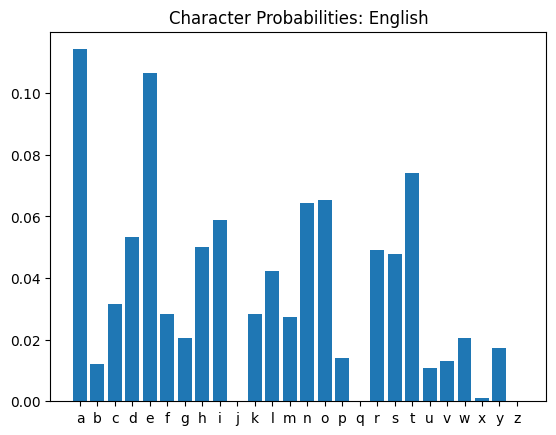

In [150]:
EN_dist = get_character_count(short_story_english)
EN_dist = get_character_probabilities(EN_dist,short_story_english)
check_probabilities_sum(EN_dist)
#Plotting the normalized distribution of the english story:
graph_character_likelihood(EN_dist, "Character Probabilities: English")



dict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
Sum of probabilities is Equal to 1.


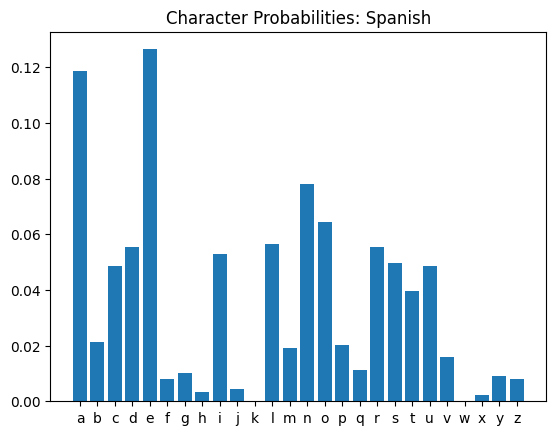

In [151]:

ES_dist = get_character_count(short_story_spanish)
ES_dist = get_character_probabilities(ES_dist,short_story_spanish)
check_probabilities_sum(ES_dist)
#Plotting the normalized distribution of the english story:
graph_character_likelihood(ES_dist, "Character Probabilities: Spanish")

In [152]:
def get_clean_text(text:str)->str:
  all_characters = string.ascii_lowercase
  uppercase_character = string.ascii_uppercase
  character_list = list(text)

  for char in character_list:
    if char in uppercase_character:
      text = text.replace(char, char.lower())
    elif char not in all_characters:
      text = text.replace(char, "")
  return text

def language_identifier(text:str):

    prob_EN = 0
    prob_ES = 0
    clean_text = get_clean_text(text)
    for character in clean_text:
      prob_EN = prob_EN + math.log(EN_dist[character]+0.0000001)
      prob_ES = prob_ES + math.log(ES_dist[character]+0.00000001)
    if prob_EN>prob_ES:
      print("The text is in English. Log Prob was", prob_EN)
    else:
      print("The text is in Spanish. Log Prob was", prob_ES)


In [153]:
language_identifier(short_story_english)

o
0.06528835690968444 0.06433408577878104
n
0.06420021762785637 0.07787810383747178
c
0.031556039173014146 0.04853273137697517
e
0.10663764961915125 0.12641083521444696
u
0.01088139281828074 0.04853273137697517
p
0.014145810663764961 0.020316027088036117
o
0.06528835690968444 0.06433408577878104
n
0.06420021762785637 0.07787810383747178
a
0.11425462459194777 0.11851015801354402
t
0.07399347116430903 0.039503386004514675
i
0.058759521218716 0.05304740406320542
m
0.02720348204570185 0.019187358916478554
e
0.10663764961915125 0.12641083521444696
t
0.07399347116430903 0.039503386004514675
h
0.05005440696409141 0.003386004514672686
e
0.10663764961915125 0.12641083521444696
r
0.04896626768226333 0.055304740406320545
e
0.10663764961915125 0.12641083521444696
w
0.020674646354733407 0.0
a
0.11425462459194777 0.11851015801354402
s
0.04787812840043525 0.04966139954853273
a
0.11425462459194777 0.11851015801354402
f
0.028291621327529923 0.007900677200902935
a
0.11425462459194777 0.11851015801354402